# Transformations, Eigenvectors, and Eigenvalues

Matrices and vectors are used together to manipulate spatial dimensions. This has a lot of applications, including the mathematical generation of 3D computer graphics, geometric modeling, and the training and optimization of machine learning algorithms. We will focus on a few key concepts that are useful to know when you plan to work with machine learning.

## Linear Transformations
You can manipulate a vector by multiplying it with a matrix. The matrix acts as an operator that maps an input vector to a new vector output. Specifically, matrix multiplications of vectors are _linear transformations_.

For example, consider the following matrix ***A*** and vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

We can define an operator ***T*** like this:

$$ T(\vec{v}) = A\vec{v} $$

To perform this transformation, we simply calculate the dot product of the matrix and the vector; multiplying each row of the matrix by the single column of the vector:

$$\begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\end{bmatrix}$$

Here's the calculation in Python:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

%matplotlib inline

In [6]:
v = np.array([1,2])
A = np.array([[2,3],
              [5,2]])

t = A.dot(v)
print (t)

[8 9]


We could view $T$ as a mapping:

$$ T: \rm I\!R^{2} \to \rm I\!R^{2} $$

Note that the output vector may have a different number of dimensions from the input vector; so the matrix function might transform the vector from one space to another - or in notation, ${\rm I\!R}$<sup>n</sup> -> ${\rm I\!R}$<sup>m</sup>.

For example, let's redefine matrix ***A***, while retaining our original definition of vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

Now if we once again define ***T*** like this:

$$ T(\vec{v}) = A\vec{v} $$

We apply the transformation like this:

$$\begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\\3\end{bmatrix}$$

So now, our transformation transforms the vector from 2-dimensional space to 3-dimensional space:

$$ T: \rm I\!R^{2} \to \rm I\!R^{3} $$

Here it is in Python:

In [7]:
v = np.array([1,2])
A = np.array([[2,3],
              [5,2],
              [1,1]])

t = A.dot(v)
print (t)

[8 9 3]


In [8]:
v = np.array([1,2])
A = np.array([[1,2],
              [2,1]])

t = A.dot(v)
print (t)

[5 4]


## Transformations of Magnitude and Amplitude

When you multiply a vector by a matrix, you transform it in at least one of the following two ways:
* Scale the _magnitude_ of the vector
* Change the _direction_ of the vector

For example consider the following matrix and vector:

$$ A = \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\0\end{bmatrix}$$

As before, we transform the vector ***v*** by multiplying it with the matrix ***A***:

\begin{equation}\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}\end{equation}

In this case, the resulting vector has changed in length (*magnitude*), but has not changed its direction (*amplitude*).

Let's visualize that in Python:

[2 0]


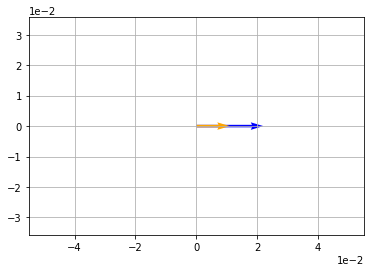

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

v = np.array([1,0])
A = np.array([[2,0],
              [0,2]])

t = A.dot(v)
print (t)

# Plot v and t
vecs = np.array([t,v])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

The original vector ***v*** is shown in orange, and the transformed vector ***t*** is shown in blue - note that ***t*** has the same direction (*amplitude*) as ***v*** but a greater length (*magnitude*).

Now let's use a different matrix to transform the vector ***v***:
\begin{equation}\begin{bmatrix}0 & -1\\1 & 0\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}\end{equation}

This time, the resulting vector has been changed to a different amplitude, but has the same magnitude.

[0 1]


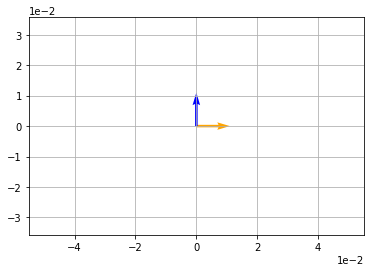

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([1,0])
A = np.array([[0,-1],
              [1,0]])

t = A.dot(v)
print (t)

# Plot v and t
vecs = np.array([v,t])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue'], scale=10)
plt.show()

Now let's see change the matrix one more time:
\begin{equation}\begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\1\end{bmatrix}\end{equation}

Now our resulting vector has been transformed to a new amplitude *and* magnitude - the transformation has affected both direction and scale.

[2 1]


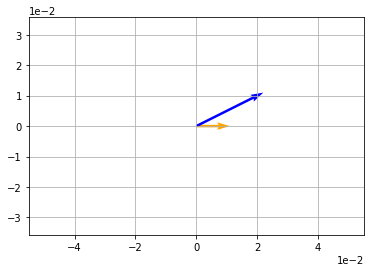

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([1,0])
A = np.array([[2,1],
              [1,2]])

t = A.dot(v)
print (t)

# Plot v and t
vecs = np.array([v,t])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue'], scale=10)
plt.show()

### Affine Transformations
An Affine transformation multiplies a vector by a matrix and adds an offset vector, sometimes referred to as *bias*; like this:

$$T(\vec{v}) = A\vec{v} + \vec{b}$$

For example:

\begin{equation}\begin{bmatrix}5 & 2\\3 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\1\end{bmatrix} + \begin{bmatrix}-2\\-6\end{bmatrix} = \begin{bmatrix}5\\-2\end{bmatrix}\end{equation}

The affine transformation forms the basis of linear regression, which is a core foundation for machine learning.

here's an example of an Affine transformation in Python:

[ 5 -2]


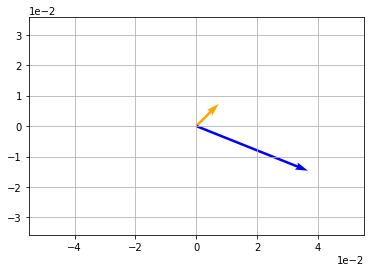

In [12]:
v = np.array([1,1])
A = np.array([[5,2],
              [3,1]])
b = np.array([-2,-6])

t = A.dot(v) + b
print (t)

# Plot v and t
vecs = np.array([v,t])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue'], scale=15)
plt.show()

## Eigenvectors and Eigenvalues
We have seen that matrix can be interpreted as a linear operator which changes its direction or magnitude, or both. Now we look at a specific class of vectors associated with the given matrix such that when multiplied with the matrix, the resulting vector only changes in its magnitude rather than direction.

We have seen the following

$$\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix} = 2 \times \begin{bmatrix}1\\0\end{bmatrix}$$

The following python performs both of these calculation and shows the results, which are identical.

[2 0]
[2 0]


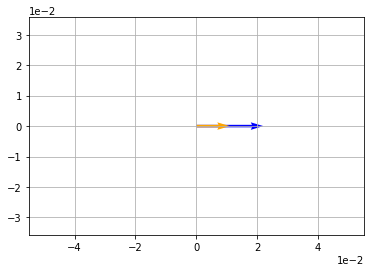

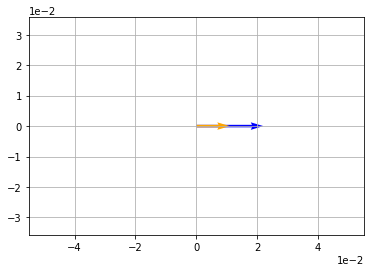

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([1,0])
A = np.array([[2,0],
              [0,2]])

t1 = A.dot(v)
print (t1)
t2 = 2*v
print (t2)

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,v])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()
a=fig.add_subplot(1,2,1)

# Plot v and t2
vecs = np.array([t2,v])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

In cases like these, where a matrix transformation is the equivelent of a scalar product, the scalar-vector pairs that correspond to the matrix are known respectively as eigenvalues and eigenvectors. We generally denote the eigenvalues using the Greek letter lambda (&lambda;), and the formula that defines eigenvalues and eigenvectors with respect to a transformation is:

$$ A\vec{v} = T(\vec{v}) = \lambda\vec{v}$$

Where the vector ***v*** is an eigenvector with its corresponding eigenvalue ***&lambda;*** of the operator (matrix) _T_ as well as the corresponding matrix _A_.

A matrix can have multiple eigenvector-eigenvalue pairs, one could compute these manually (via solving the charateristic polynomial). In Python we can use the _numpy.linalg.eig()_ function, which returns an array of eigenvalues and a matrix whose columns are the corresponding eigenvectors.

Here's an example that returns the eigenvalue and eigenvector pairs for the following matrix:

$$A=\begin{bmatrix}2 & 0\\0 & 3\end{bmatrix}$$

In [14]:
A = np.array([[2,0],
              [0,3]])
eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[2. 3.]
[[1. 0.]
 [0. 1.]]


So there are two eigenvalue-eigenvector pairs for this matrix, as shown here:

$$ \lambda_{1} = 2, \vec{v_{1}} = \begin{bmatrix}1 \\ 0\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 3, \vec{v_{2}} = \begin{bmatrix}0 \\ 1\end{bmatrix} $$

Let's verify that multiplying each eigenvalue-eigenvector pair corresponds to the dot-product of the eigenvector and the matrix. Here's the first pair:

$$ 2 \times \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix} $$

So far so good. Now let's check the second pair:

$$ 3 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix} $$

So our eigenvalue-eigenvector scalar multiplications do indeed correspond to our matrix-eigenvector dot-product transformations.

We could also check using the following python codes:

In [15]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A.dot(vec1)))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A.dot(vec2)))
print ('lam2 x v2: ' + str(lam2*vec2))

Matrix A:
[[2 0]
 [0 3]]
-------
lam1: 2.0
v1: [1. 0.]
Av1: [2. 0.]
lam1 x v1: [2. 0.]
-------
lam2: 3.0
v2: [0. 1.]
Av2: [0. 3.]
lam2 x v2: [0. 3.]


You can use the following code to visualize these transformations:

[2. 0.]
[0. 3.]


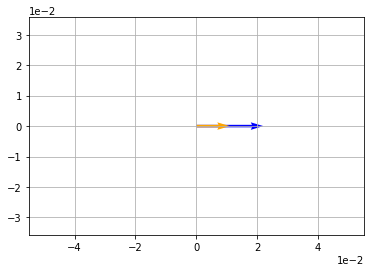

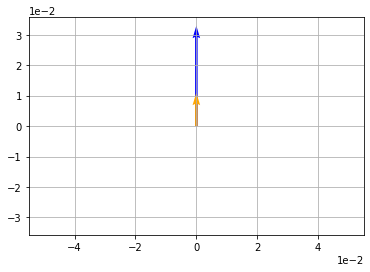

In [17]:
t1 = lam1*vec1
print (t1)
t2 = lam2*vec2
print (t2)

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,vec1])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()
a=fig.add_subplot(1,2,1)
# Plot v and t2
vecs = np.array([t2,vec2])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

Let's take a look at one more, slightly more complex example. Here's our matrix:

$$\begin{bmatrix}2 & 1\\1 & 2\end{bmatrix}$$

Let's get the eigenvalue and eigenvector pairs:

In [18]:
A = np.array([[2,1],
              [1,2]])

eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


This time the eigenvalue-eigenvector pairs are:

$$ \lambda_{1} = 3, \vec{v_{1}} = \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 1, \vec{v_{2}} = \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} $$

So let's check the first pair:

$$ 3 \times \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix} $$

Now let's check the second pair:

$$ 1 \times \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix} $$

With more complex examples like this, it's generally easier to do it with Python:

Matrix A:
[[2 1]
 [1 2]]
-------
lam1: 3.0
v1: [0.70710678 0.70710678]
Av1: [2.12132034 2.12132034]
lam1 x v1: [2.12132034 2.12132034]
-------
lam2: 1.0
v2: [-0.70710678  0.70710678]
Av2: [-0.70710678  0.70710678]
lam2 x v2: [-0.70710678  0.70710678]


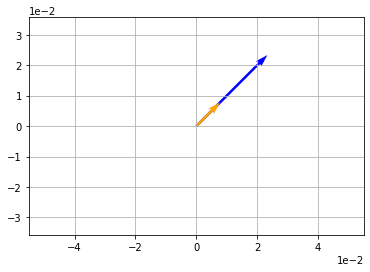

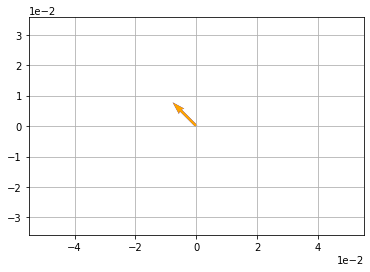

In [19]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A.dot(vec1)))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A.dot(vec2)))
print ('lam2 x v2: ' + str(lam2*vec2))


# Plot the results
t1 = lam1*vec1
t2 = lam2*vec2

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,vec1])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()
a=fig.add_subplot(1,2,1)
# Plot v and t2
vecs = np.array([t2,vec2])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

## Eigendecomposition
Note that vectors can exist in any spatial orientation, or *basis*; and the same transformation can be applied in different *bases*.

We can decompose a matrix using the following formula:

$$A = Q \Lambda Q^{-1}$$

Where ***A*** is a trasformation that can be applied to a vector in its current base, ***Q*** is a matrix of eigenvectors that defines a change of basis, and ***&Lambda;*** is a matrix with eigenvalues on the diagonal that defines the same linear transformation as ***A*** in the base defined by ***Q***.

Let's look at these in some more detail. Consider this matrix:

$$A=\begin{bmatrix}3 & 2\\1 & 0\end{bmatrix}$$

***Q*** is a matrix in which each column is an eigenvector of ***A***; which as we've seen previously that can be computed using NumPy function:

In [20]:
A = np.array([[3,2],
              [1,0]])

l, Q = np.linalg.eig(A)
print(Q)

[[ 0.96276969 -0.48963374]
 [ 0.27032301  0.87192821]]


So for matrix ***A***, ***Q*** is the following matrix:

$$Q=\begin{bmatrix}0.96276969 & -0.48963374\\0.27032301 & 0.87192821\end{bmatrix}$$

***&Lambda;*** is a matrix that contains the eigenvalues for ***A*** on the diagonal, with zeros in all other elements; so for a 2x2 matrix, &Lambda; will look like this:

$$\Lambda=\begin{bmatrix}\lambda_{1} & 0\\0 & \lambda_{2}\end{bmatrix}$$

So we need to turn the array of eigenvalues computed using _numpy.linalg.eig()_ into a diagonal matrix using _numpy.diag()_:

In [21]:
L = np.diag(l)
print (L)

[[ 3.56155281  0.        ]
 [ 0.         -0.56155281]]


So ***&Lambda;*** is the following matrix:

$$\Lambda=\begin{bmatrix}3.56155281 & 0\\0 & -0.56155281\end{bmatrix}$$

Now we just need to find ***Q<sup>-1</sup>***, which is the inverse of ***Q***:

In [22]:
Qinv = np.linalg.inv(Q)
print(Qinv)

[[ 0.89720673  0.50382896]
 [-0.27816009  0.99068183]]


The inverse of ***Q*** then, is:

$$Q^{-1}=\begin{bmatrix}0.89720673 & 0.50382896\\-0.27816009 & 0.99068183\end{bmatrix}$$

Using these quantites, we could re-express the linear transformation $A$ using the eigendecomposition as the composition of three separate operators:

$$A\vec{v} = Q \Lambda Q^{-1}\vec{v}$$

To prove this, let's take any vector ***v***, e.g.,

$$\vec{v} = \begin{bmatrix}1\\3\end{bmatrix} $$

Now we check that the above equations hold using Python.

First we check $A\vec{v}$:

[9 1]


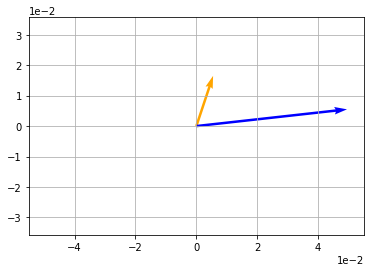

In [23]:
v = np.array([1,3])
t = A.dot(v)

print(t)

# Plot v and t
vecs = np.array([v,t])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'b'], scale=20)
plt.show()

And now, we check $Q\Lambda Q^{-1}\vec{v}$

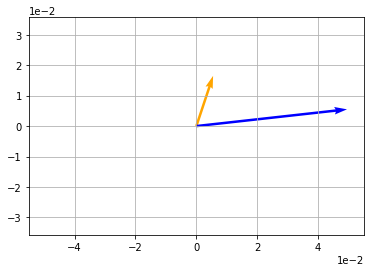

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = (Q.dot(L.dot(Qinv))).dot(v)

# Plot v and t
vecs = np.array([v,t])
origin = [0, 0], [0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'b'], scale=20)
plt.show()

So ***A*** and ***Q&Lambda;Q<sup>-1</sup>*** are equivalent.

If we view the intermediary stages of the decomposed transformation, you can see the transformation using ***A*** in the original base for ***v*** (orange to blue) and the transformation using ***&Lambda;*** in the change of basis decribed by ***Q*** (red to magenta):

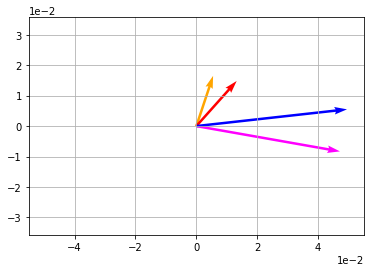

In [25]:
t1 = Qinv.dot(v)
t2 = L.dot(t1)
t3 = Q.dot(t2)

# Plot the transformations
vecs = np.array([v,t1, t2, t3])
origin = [0, 0, 0, 0], [0, 0, 0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'red', 'magenta', 'blue'], scale=20)
plt.show()

## Inverse of a Square Full Rank Matrix
You can calculate the inverse of a square full rank matrix by using its eigendecomposition:

$$A^{-1} = Q \Lambda^{-1} Q^{-1}$$

Let's apply this to matrix ***A***:

$$A=\begin{bmatrix}1 & 2\\4 & 3\end{bmatrix}$$

Let's find the matrices for ***Q***, ***&Lambda;<sup>-1</sup>***, and ***Q<sup>-1</sup>***:

In [26]:
A = np.array([[1,2],
              [4,3]])

l, Q = np.linalg.eig(A)
L = np.diag(l)
print(Q)
Linv = np.linalg.inv(L)
Qinv = np.linalg.inv(Q)
print(Linv)
print(Qinv)

[[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]
[[-1.  -0. ]
 [ 0.   0.2]]
[[-0.94280904  0.47140452]
 [-0.74535599 -0.74535599]]


So:

$$A^{-1}=\begin{bmatrix}-0.70710678 & -0.4472136\\0.70710678 & -0.89442719\end{bmatrix}\cdot\begin{bmatrix}-1 & -0\\0 & 0.2\end{bmatrix}\cdot\begin{bmatrix}-0.94280904 & 0.47140452\\-0.74535599 & -0.74535599\end{bmatrix}$$

Let's calculate that in Python:

In [27]:
Ainv = (Q.dot(Linv.dot(Qinv)))
print(Ainv)

[[-0.6  0.4]
 [ 0.8 -0.2]]


That gives us the result:

$$A^{-1}=\begin{bmatrix}-0.6 & 0.4\\0.8 & -0.2\end{bmatrix}$$

We can apply the _np.linalg.inv()_ function directly to ***A*** to verify this:

In [28]:
print(np.linalg.inv(A))

[[-0.6  0.4]
 [ 0.8 -0.2]]


# Application: Principal Component Analysis

PCA is an unsupervised learning algorithm for dimensionality reduction and is also commonly used for feature reduction. Assuming the data $\{x_{i}\in\mathbb{R}^m| i = 1, \dots, n\}$ have zero mean, the goal is to find an orthogonal set consisting of $n$ vectors whose directions correspond to the top $n$ greatest variances respectively. Equivalently, we define the top $n$ principal components as the first $n$ eigenvectors (ranked by the corresponding eigenvalues) of the covariance matrix $S$ defined as:
$$\begin{equation} S = XX^T\end{equation}$$
where $X\in \mathbb{R}^{n\times m}$ is the data matrix whose $i$-th column is $x_{i}$. We will assume it is true for now. 

In [35]:
def PCA(X: np.ndarray, num: int) -> np.ndarray:
    '''
    X: data matrix of shape n x m, with each column as a (m-dimensional) data point
    num: number of principal components
    Return:
    P: a matrix of shape m x num with its i-th column as the i-th principal component
    '''
    P = None
    # TODO: compute the first num principal components and store them in P
    # Hint: do not forget to subtract the sample mean!
    S = X * X.transpose
    return P

In [30]:
# creating the data
np.random.seed(2020)
mu1 = np.array([0, 0, 0])
cov1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
sample_1 = np.random.multivariate_normal(mu1, cov1, 50)

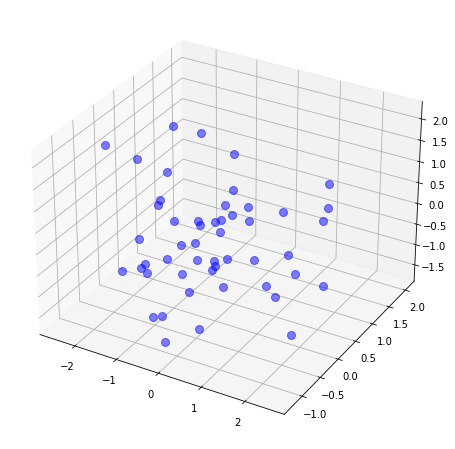

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(sample_1[:, 0], sample_1[:, 1], sample_1[:, 2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
# ax.plot(sample_2[0,:], sample_2[1,:], sample_2[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

In [ ]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [ ]:
def plotPCA(X, P):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(X[:, 0], X[:, 1], X[:, 2], 'o', markersize=9, color='green', alpha=0.2)
    ax.plot([np.mean(X[:, 0])], [np.mean(X[:, 1])], [np.mean(X[:, 2])], 'p', markersize=10, color='red', alpha=0.5)
    for i in range(P.shape[1]):
        a = Arrow3D([np.mean(X[:, 0]), P[0, i]], [np.mean(X[:, 1]), P[1, i]], [np.mean(X[:, 2]), P[2, i]], 
                   mutation_sacle=20, lw=3, arrowstyle='-|>', color='r')
        ax.add_artist(a)
    plt.show()

## TODO: using your PCA() function to generate the first 3 principal components of the data sample_1, then visualise your computed principal components using the plotPCA() function provided